In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)
df.to_csv('module_5_auto.csv')
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [2]:
# libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

In [3]:
from sklearn.model_selection import train_test_split

y_data = df['price']
x_data = df.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [4]:
# 40% for testing
# Write your code below and press Shift+Enter to execute 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=1)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [6]:
model.score(x_test[['horsepower']], y_test), model.score(x_train[['horsepower']], y_train)

(0.3635875575078824, 0.6619724197515103)

In [7]:
# R^2 on the test data using 40% of the dataset for testing

model.fit(x_train1[['horsepower']], y_train1), model.score(x_test1[['horsepower']], y_test1), model.score(x_train1[['horsepower']], y_train1)

(LinearRegression(), 0.6111827529454426, 0.6755325771980133)

# Cross-Validation Score

In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict

Rcross = cross_val_score(model, x_data[['horsepower']], y_data, cv=4)
np.mean(Rcross)

0.522009915042119

In [9]:
np.mean(-1 * cross_val_score(model,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error'))

23525298.54198599

In [10]:
Rcross = cross_val_score(model, x_data[['horsepower']], y_data, cv=2)

Rcross[1] # R^2 for the second fold utilizing the "horsepower" feature

0.44319612775502903

In [11]:
#using the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds,
#with one fold for testing and the other folds are used for training.
yhat = cross_val_predict(model,x_data[['horsepower']], y_data,cv=4)
yhat[0:5], y_data[:5]

(array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
        14762.35027598]),
 0    13495.0
 1    16500.0
 2    16500.0
 3    13950.0
 4    17450.0
 Name: price, dtype: float64)

# Part 2: Overfitting, Underfitting and Model Selection

In [12]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [13]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


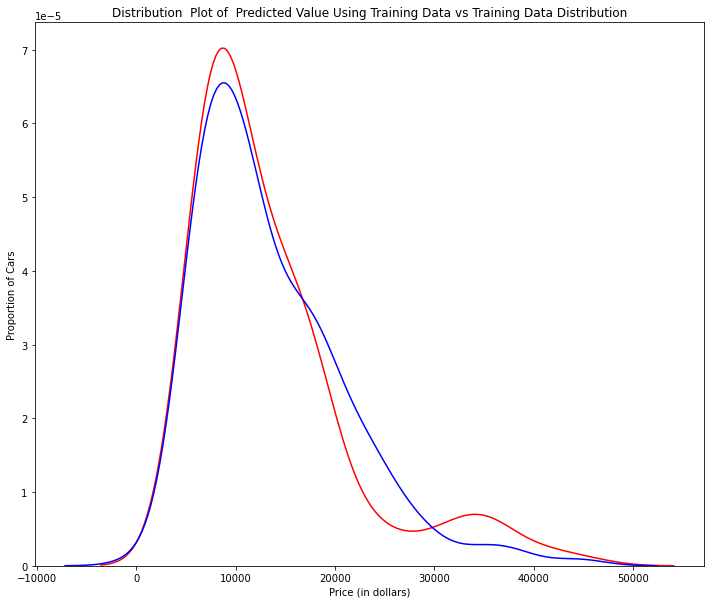

In [15]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


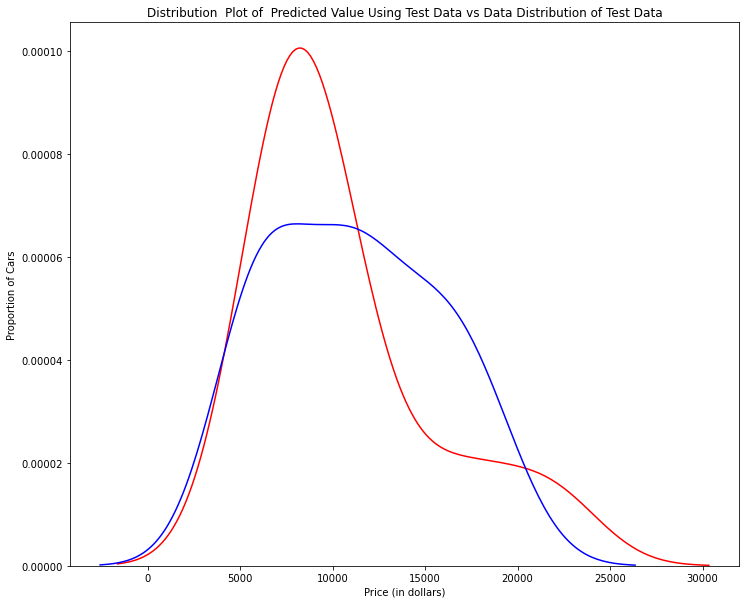

In [16]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [17]:
from sklearn.preprocessing import PolynomialFeatures

## Overfitting

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [19]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [20]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [21]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.71508499,  7308.03837696, 12213.79222245, 18893.17259916,
       19995.86710176])

In [22]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.71508499  7308.03837696 12213.79222245 18893.17259916]
True values: [ 6295. 10698. 13860. 13499.]


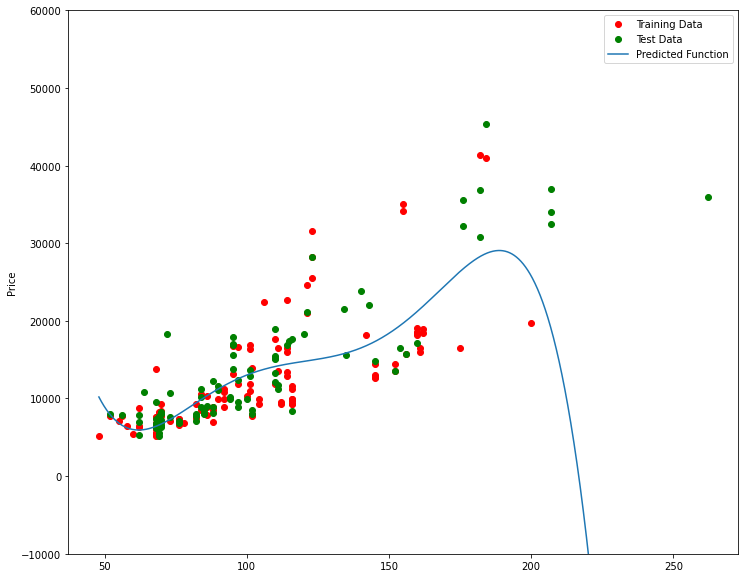

In [23]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [24]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.5567716902601785

In [25]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.871479278233295

A negative R^2 is a sign of overfitting

Text(3, 0.75, 'Maximum R^2 ')

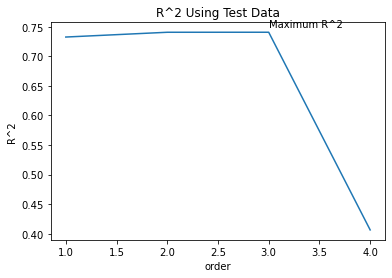

In [26]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [27]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [28]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [29]:
pr1 = PolynomialFeatures(degree=2)
pr1

PolynomialFeatures()

In [30]:
x_train_pr1 = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [31]:
x_train_pr1.shape

(110, 70)

In [32]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [33]:
yhat1 = poly1.predict(x_test_pr1)
yhat1[0:5]

array([  1567.59548786,  10535.71470682, -43342.84355523,  -9458.21047162,
        20849.19317199])

C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


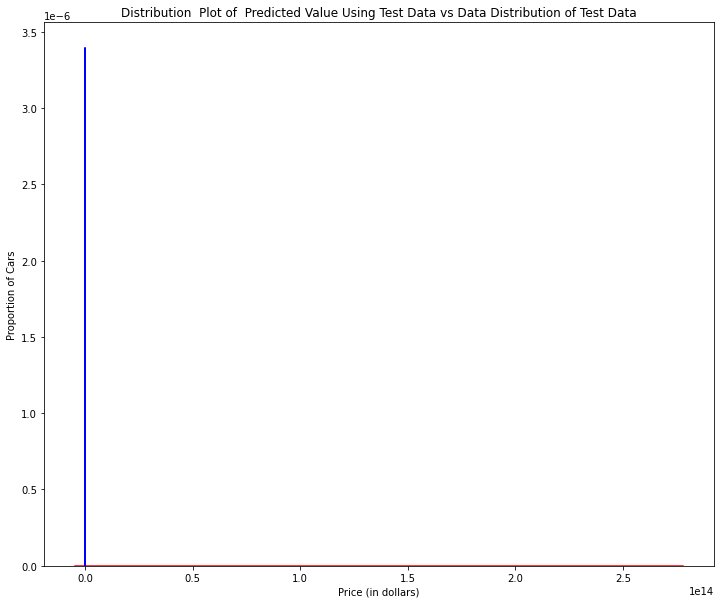

In [34]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(x_test_pr1,yhat1,"Actual Values (Test)","Predicted Values (Test)",Title)

The predicted value is higher than actual value for cars where the price $10,000 range, conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

# Part 3: Ridge Regression

In [35]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [36]:
from sklearn.linear_model import Ridge

In [37]:
RigeModel=Ridge(alpha=1)

In [38]:
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [39]:
#select the value of alpha that minimizes the test error. 
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:02<00:00, 483.56it/s, Test Score=0.564, Train Score=0.859]


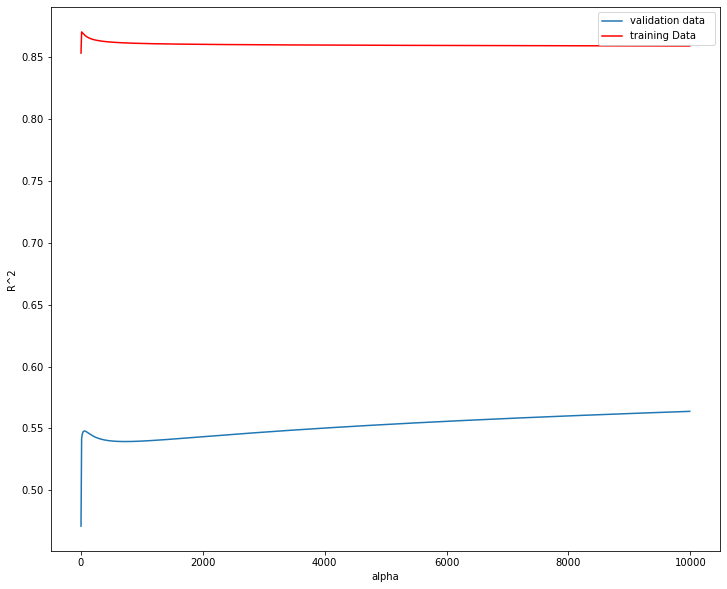

In [40]:
# plot out the value of R^2 for different alphas

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

the model is built and tested on the same data, so the training and test data are the same.

The red line in the Figure represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [41]:
RigeModel1=Ridge(alpha=10)
RigeModel1.fit(x_train_pr, y_train)
yhat = RigeModel1.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6472.05406775  9537.15585237 21078.08955884 19750.77444841]
test set : [ 6295. 10698. 13860. 13499.]


In [42]:
RigeModel1.score(x_test_pr, y_test)

0.5418576440207341

# Part 4: Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [44]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [45]:
# grid search for the alpha parameter and the normalization parameter
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize' : [True, False]}]
RR2=Ridge()
Grid2 = GridSearchCV(RR2, parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR2=Grid2.best_estimator_
BestRR2

Ridge(alpha=0.1, normalize=True)

In [46]:
BestRR2.score(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

0.8067357870903056